In [1]:
%pylab inline
from datascience import *
import pandas as pd
import numpy as np
import os
import re

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Notes

- Changed all [he, she] into [he/ she]
- Changed all [itself, themselves] to [itself/ themselves]

In [2]:
with open('Enmerkar.txt', 'r') as text_file:
    enmerkar = text_file.read()

In [3]:
enmerkar_list = enmerkar.split(':')
enmerkar_list = [word for word in enmerkar_list if '[' in word]

In [4]:
etcsl_words = re.findall(r"(?<=\[)(.*?)(?=\])", enmerkar)
etcsl_words = [word for word in etcsl_words if word != '1']
etcsl_words

['brick(work)',
 '(mountain) land',
 'shining',
 'to go out or in',
 'brick(work)',
 'flat space',
 'lapis lazuli',
 'to go out or in',
 'town',
 'heaven',
 'place',
 'to grow',
 'name',
 'rainbow',
 'heaven',
 'to be adjacent',
 'brilliance',
 'to be multicoloured',
 'heaven',
 'to stand',
 'crescent (moon)',
 'to be new',
 'to be',
 'essence',
 'to be big',
 'princeliness',
 'to erect',
 '(mountain) land',
 'to be pure',
 'day(light)',
 'to be good',
 'place',
 'to place',
 'moon(light)',
 'the Land',
 'to go out or in',
 'day(light)',
 'to be shining',
 'the Land',
 'horn',
 'to equal',
 'rear cow',
 'type of cow',
 'abundance',
 'to go out or in',
 'mouth',
 'to cut',
 '(mountain) land',
 'to approach',
 '(awesome) radiance',
 'bright metal',
 'right',
 'garment',
 'to cover (together)',
 'linen (fibre)',
 'to release',
 'day(light)',
 'day(light)',
 'lord',
 'night',
 'dais',
 'king',
 'minister',
 'lord',
 'minister',
 'name',
 'to be',
 'minister',
 'lord',
 'name',
 'lord',
 't

In [5]:
Enmerkar_table = Table.read_table('Enmerkar.txt', sep = ',')
Enmerkar_table = Enmerkar_table.drop(['etcsl_no', 1])
Enmerkar_table

l_no,text
1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...
2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...
3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N
4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...
5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...
6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...
7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...
8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...
9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...
10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...


In [6]:
def term_finder (line):
    terms = re.findall(r"(?<=\[)(.*?)(?=\])", line)
    return terms

def proper_noun(line):
    nouns = re.findall(r"(?<=\:)(.*?)(?=\[)", line)
    nouns = [word for word in nouns if (len(word) > 1 and word[0].isupper() and not word[1].isupper())]
    return nouns

In [7]:
line_table = []
nouns = []

for i in range(Enmerkar_table.num_rows):
    line_table.append(term_finder(Enmerkar_table[1][i]))
    nouns.append(proper_noun(Enmerkar_table[1][i]))


In [8]:
Enmerkar_terms = Enmerkar_table.with_column('terms', line_table)
Enmerkar_terms

l_no,text,terms
1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...,"['brick(work)', '(mountain) land', 'shining', 'to go out ..."
2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...,"['1', 'town', 'heaven', 'place', 'to grow']"
3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N,"['1', 'name', 'rainbow']"
4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...,"['heaven', 'to be adjacent', 'brilliance', 'to be multic ..."
5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...,"['heaven', 'to stand', 'crescent (moon)', 'to be new', ' ..."
6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...,"['essence', 'to be big', 'princeliness', 'to erect']"
7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...,"['(mountain) land', 'to be pure', 'day(light)', 'to be g ..."
8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...,"['moon(light)', 'the Land', 'to go out or in']"
9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...,"['day(light)', 'to be shining', 'the Land', 'horn', 'to ..."
10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...,"['rear cow', 'type of cow', 'abundance', 'to go out or in']"


In [9]:
Enmerkar_terms = Enmerkar_terms.with_column('proper nouns',nouns)
Enmerkar_terms.drop('text')

l_no,text,terms,proper nouns
1,sux:šeg₁₂[brick(work)]N sux:kur[(mountain) land]N sux:šu ...,"['brick(work)', '(mountain) land', 'shining', 'to go out ...",[]
2,sux:Kulaba[1]SN sux:iri[town]N sux:an[heaven]N sux:ki[pl ...,"['1', 'town', 'heaven', 'place', 'to grow']",['Kulaba']
3,sux:Unug[1]SN sux:mu[name]N sux:tir-an-na[rainbow]N,"['1', 'name', 'rainbow']",['Unug']
4,sux:an[heaven]N sux:us₂[to be adjacent]V sux:si-muš₃[bri ...,"['heaven', 'to be adjacent', 'brilliance', 'to be multic ...",[]
5,sux:an[heaven]N sux:gub[to stand]V sux:ud-sakar[crescent ...,"['heaven', 'to stand', 'crescent (moon)', 'to be new', ' ...",[]
6,sux:me[essence]N sux:gal[to be big]V sux:nam-nun[princel ...,"['essence', 'to be big', 'princeliness', 'to erect']",[]
7,sux:kur[(mountain) land]N sux:sikil[to be pure]V sux:ud[ ...,"['(mountain) land', 'to be pure', 'day(light)', 'to be g ...",[]
8,sux:itid[moon(light)]N sux:kalam[the Land]N sux:e₃[to go ...,"['moon(light)', 'the Land', 'to go out or in']",[]
9,sux:ud[day(light)]N sux:zalag[to be shining]V sux:kalam[ ...,"['day(light)', 'to be shining', 'the Land', 'horn', 'to ...",[]
10,sux:ab₂-ur₃[rear cow]N sux:ab₂-saharₓ[type of cow]N sux: ...,"['rear cow', 'type of cow', 'abundance', 'to go out or in']",[]


In [94]:
def partitioning(line_no):
    
    ln = int(''.join(c for c in line_no if c.isdigit()))

    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    
    elif (ln <= 39):
        return "2.1.1"
    elif (ln <= 51):
        return "2.1.2"
    elif (ln <= 69):
        return "2.1.3"
    
    elif (ln <= 76):
        return "2.2.1"
    elif (ln <= 90):
        return "2.2.2"
    elif (ln <= 113):
        return "2.2.3"
    
    elif (ln <= 127):
        return "2.3.1"
    elif (ln <= 132):
        return "2.3.2"
    elif (ln <= 134):
        return "2.3.3"
    
    elif (ln <= 138):
        return "3.1.1"
    elif (ln <= 149):
        return "3.1.2"
    elif (ln <= 162):
        return "3.1.3"
    elif (ln <= 169):
        return "3.1.4"
    
    elif (ln <= 184):
        return "3.2.1"
    elif (ln <= 197):
        return "3.2.2"
    elif (ln <= 205):
        return "3.2.3"
    elif (ln <= 210):
        return "3.2.4"
    elif (ln <= 221):
        return "3.2.5"
    
    elif (ln <= 227):
        return "4.1"
    
    elif (ln <= 248):
        return "4.2.1"
    elif (ln <= 254):
        return "4.2.2"
    elif (ln <= 263):
        return "4.2.3"
    elif (ln <= 273):
        return "4.2.4"
    
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "B"
    return "0"

def small_partition(line_no):
    ln = int(''.join(c for c in line_no if c.isdigit()))
    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    elif (ln <= 69):
        return "2.1"
    elif (ln <= 113):
        return "2.2"
    elif (ln <= 134):
        return "2.3"
    elif (ln <= 169):
        return "3.1"
    elif (ln <= 221):
        return "3.2"
    elif (ln <= 227):
        return "4.1"
    elif (ln <= 273):
        return "4.2"
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "6"
    return "0"


In [95]:
Enmerkar_terms.append_column('section', Enmerkar_terms.apply(small_partition, 0))
Enmerkar_graph = Enmerkar_terms.select([3, 4]).group('section', list)
Enmerkar_graph

section,proper nouns list
1.1,"[[], ['Kulaba'], ['Unug'], [], [], [], [], [], [], [], [ ..."
1.2,"[['Utu'], ['Aratta', 'Ansiga-ria'], ['Enmerkar', 'Kulaba ..."
2.1,"[['Unug', 'Kulaba'], ['Aratta', 'En-suhgir-ana'], ['Unug ..."
2.2,"[['Unug'], [], [], [], ['Aratta'], ['Aratta'], [], [], [ ..."
2.3,"[['Enmerkar', 'En-suhgir-ana'], [], [], ['En-suhgir-ana' ..."
3.1,"[['Hamazi'], ['Ur-ŋiri-nuna', 'Hamazi'], ['Hamazi', 'Ara ..."
3.2,"[[], ['Ereš', 'Nisaba'], [], [], [], [], ['Nisaba'], ['N ..."
4.1,"[[], [], ['Ereš'], ['Euphrates'], ['An', 'Enlil'], ['Saŋ ..."
4.2,"[[], [], ['Saŋburu'], [], [], [], ['Saŋburu'], [], [], [ ..."
5.1,"[['En-suhgir-ana'], ['Enmerkar'], ['Inana'], ['Inana'], ..."


In [96]:
def list_flattening(pn_list):
    return [noun for nouns in pn_list for noun in nouns]

Enmerkar_graph.append_column('proper nouns', Enmerkar_graph.apply(list_flattening, 1))
Enmerkar_graph

section,proper nouns list,proper nouns
1.1,"[[], ['Kulaba'], ['Unug'], [], [], [], [], [], [], [], [ ...","['Kulaba', 'Unug', 'Unug', 'Aratta']"
1.2,"[['Utu'], ['Aratta', 'Ansiga-ria'], ['Enmerkar', 'Kulaba ...","['Utu', 'Aratta', 'Ansiga-ria', 'Enmerkar', 'Kulaba', 'N ..."
2.1,"[['Unug', 'Kulaba'], ['Aratta', 'En-suhgir-ana'], ['Unug ...","['Unug', 'Kulaba', 'Aratta', 'En-suhgir-ana', 'Unug', 'I ..."
2.2,"[['Unug'], [], [], [], ['Aratta'], ['Aratta'], [], [], [ ...","['Unug', 'Aratta', 'Aratta', 'Inana', 'E-zagin', 'Aratta ..."
2.3,"[['Enmerkar', 'En-suhgir-ana'], [], [], ['En-suhgir-ana' ...","['Enmerkar', 'En-suhgir-ana', 'En-suhgir-ana', 'Unug', ' ..."
3.1,"[['Hamazi'], ['Ur-ŋiri-nuna', 'Hamazi'], ['Hamazi', 'Ara ...","['Hamazi', 'Ur-ŋiri-nuna', 'Hamazi', 'Hamazi', 'Aratta', ..."
3.2,"[[], ['Ereš', 'Nisaba'], [], [], [], [], ['Nisaba'], ['N ...","['Ereš', 'Nisaba', 'Nisaba', 'Nisaba', 'Nisaba', 'Nisaba ..."
4.1,"[[], [], ['Ereš'], ['Euphrates'], ['An', 'Enlil'], ['Saŋ ...","['Ereš', 'Euphrates', 'An', 'Enlil', 'Saŋburu']"
4.2,"[[], [], ['Saŋburu'], [], [], [], ['Saŋburu'], [], [], [ ...","['Saŋburu', 'Saŋburu', 'Saŋburu', 'Saŋburu', 'Saŋburu', ..."
5.1,"[['En-suhgir-ana'], ['Enmerkar'], ['Inana'], ['Inana'], ...","['En-suhgir-ana', 'Enmerkar', 'Inana', 'Inana']"


In [104]:
from collections import Counter
proper_nouns_list = set(list_flattening(Enmerkar_graph.column('proper nouns')))

rows = []
for i in np.arange(0, Enmerkar_graph.num_rows):
    counts = []
    for noun in proper_nouns_list:
        counts.append(Enmerkar_graph['proper nouns'][i].count(noun))
    rows.append(list(np.array(counts).cumsum()))
    
Enmerkar_plot = Table(proper_nouns_list).with_rows(rows)
Enmerkar_plot.append_column('section', Enmerkar_graph.column('section'))
Enmerkar_plot.move_to_start('section')
Enmerkar_plot

section,Enlil,Namena-tuma,E-zagin,Unug,Nanna,Ereš,Euphrates,Kulaba,Šakkan,Saŋburu,Anzud,Aruru,Utu,Maš-gula,Enmerkar,E-ŋipar,Nisaba,Ninurta,Ur-edina,Ansiga-ria,An,En-suhgir-ana,Ninlil,Aratta,Sumer,Inana,Hamazi,E-ana,Ur-ŋiri-nuna
1.1,0,0,0,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4
1.2,0,1,1,1,1,1,1,2,2,2,2,2,3,3,4,4,4,4,4,5,5,5,5,6,6,6,6,6,6
2.1,0,0,2,4,4,4,4,5,6,6,6,6,6,6,8,8,8,8,8,8,8,12,12,16,16,24,24,24,24
2.2,3,3,4,6,6,6,6,7,7,7,8,9,10,10,10,10,10,11,11,11,11,11,11,18,20,24,24,25,25
2.3,0,0,0,6,6,6,6,8,8,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,13,13,13,13,13
3.1,0,0,2,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,12,12,12,12,17,17,17,20,20,21
3.2,2,2,2,2,2,3,3,3,3,3,3,3,5,6,6,6,17,17,18,18,18,18,18,19,19,19,19,19,19
4.1,1,1,1,1,1,2,3,3,3,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5
4.2,1,1,1,1,2,4,5,5,5,13,13,13,13,13,13,13,14,14,14,14,15,15,16,18,18,18,18,18,18
5.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,4,4,4,4


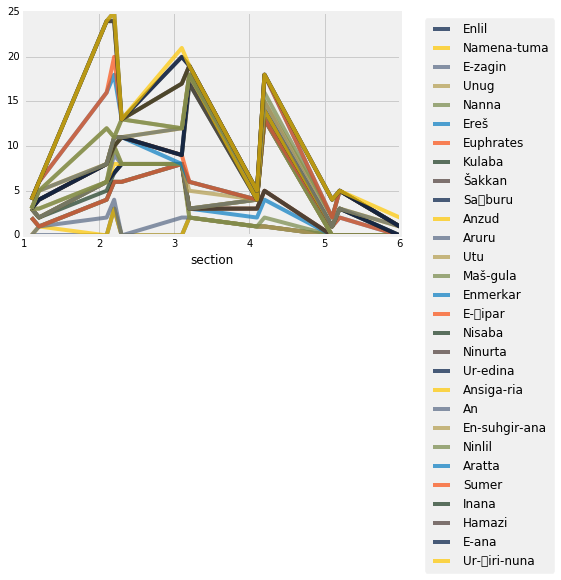

In [109]:
Enmerkar_plot.plot('section', overlay=True)

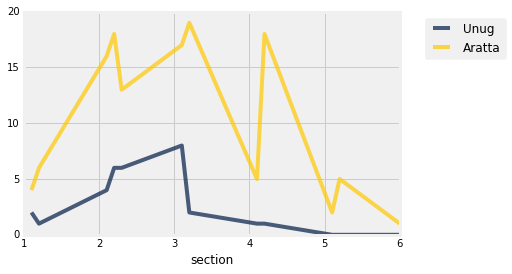

In [107]:
Enmerkar_plot.select(['section', 'Unug', 'Aratta']).plot('section', overlay=True)

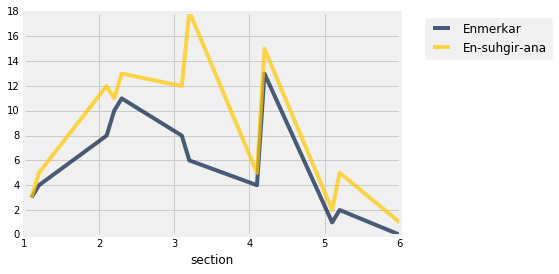

In [108]:
Enmerkar_plot.select(['section', 'Enmerkar', 'En-suhgir-ana']).plot('section', overlay=True)